# Practical No. 5 
## Logical Regression

### Aditya S. Thorat
### 13357

In [21]:
%matplotlib inline

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
dset = pd.read_csv('soneta.csv')
print(dset)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


In [3]:
dset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [4]:
dset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
dset.groupby(['Gender'])['Purchased'].sum()

Gender
Female    77
Male      66
Name: Purchased, dtype: int64

In [6]:
dset.groupby(['Gender'])['EstimatedSalary'].mean()

Gender
Female    71759.803922
Male      67642.857143
Name: EstimatedSalary, dtype: float64

In [7]:
ctab= pd.crosstab(index= dset.Gender, columns= 'Count', normalize= True)
print(ctab)

col_0   Count
Gender       
Female   0.51
Male     0.49


In [8]:
cdta= dset.drop(['User ID'], axis=1)

In [9]:
cdta['Gender'].replace(['Male', 'Female'], [0, 1], inplace=True)

In [10]:
print(cdta)

     Gender  Age  EstimatedSalary  Purchased
0         0   19            19000          0
1         0   35            20000          0
2         1   26            43000          0
3         1   27            57000          0
4         0   19            76000          0
..      ...  ...              ...        ...
395       1   46            41000          1
396       0   51            23000          1
397       1   50            20000          1
398       0   36            33000          0
399       1   49            36000          1

[400 rows x 4 columns]


In [11]:
cdta.corr()

,Gender,Age,EstimatedSalary,Purchased
Gender,1.000000,0.073741,0.060435,0.042469
Age,0.073741,1.000000,0.155238,0.622454
EstimatedSalary,0.060435,0.155238,1.000000,0.362083
Purchased,0.042469,0.622454,0.362083,1.000000


In [12]:
gen_v_pur= pd.crosstab(index= dset.Gender, columns= dset.Purchased, normalize= 'index')

In [13]:
print(gen_v_pur)

Purchased         0         1
Gender                       
Female     0.622549  0.377451
Male       0.663265  0.336735


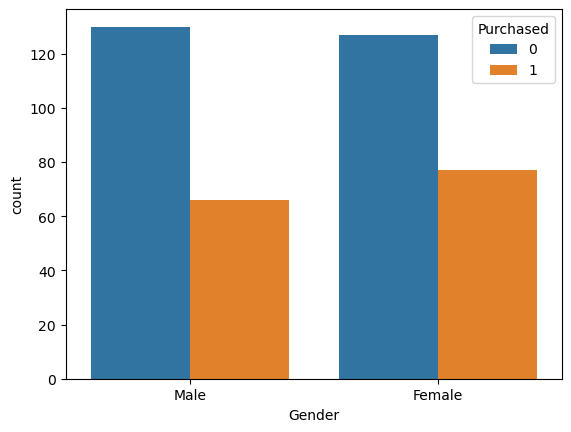

In [14]:
c_graph= sb.countplot(x= 'Gender', hue= 'Purchased', data= dset)

C:\Users\Welcome\AppData\Local\Temp\ipykernel_3000\2372011778.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  d_graph= sb.distplot(cdta['Age'], bins=20, kde= False)


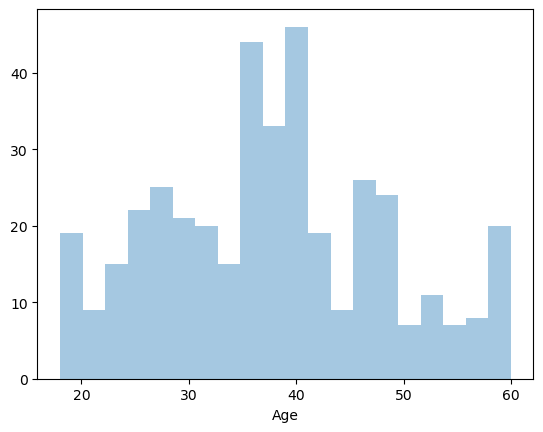

In [15]:
d_graph= sb.distplot(cdta['Age'], bins=20, kde= False)

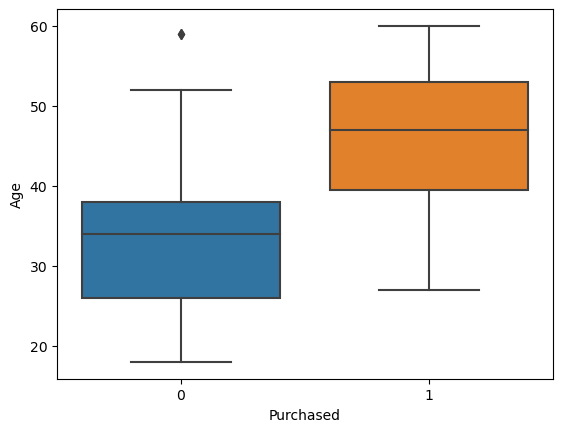

In [16]:
b_graph= sb.boxplot(x= 'Purchased', y= 'Age', data=cdta)

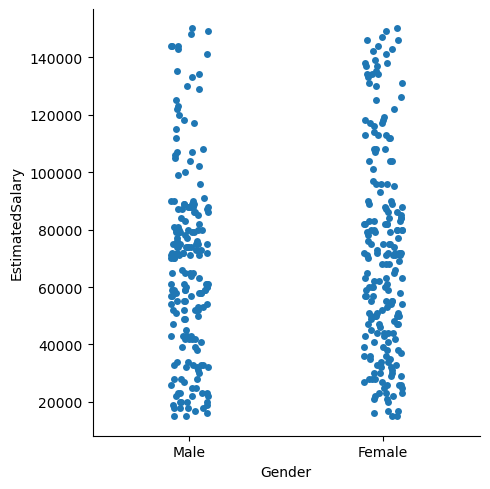

In [17]:
cat_graph= sb.catplot(x= 'Gender', y= 'EstimatedSalary', data=dset)

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [69]:
logR_model1= LogisticRegression()

In [77]:
x_train, x_test, y_train, y_test= train_test_split(cdta.Age, cdta.Purchased, test_size =0.2)

In [78]:
len(x_train), len(x_test)

(320, 80)

In [79]:
logR_model1.fit(np.array(x_train).reshape(-1,1), y_train)

LogisticRegression()

In [80]:
logR_model1.score(np.array(x_test).reshape(-1,1), y_test)

0.8875

######  Accuracy = 89% through logical Regression model 

In [82]:
y_pred= logR_model1.predict(np.array(x_test).reshape(-1,1))

In [84]:
con_m= confusion_matrix(y_test, y_pred)

Text(95.72222222222221, 0.5, 'Actual Data')

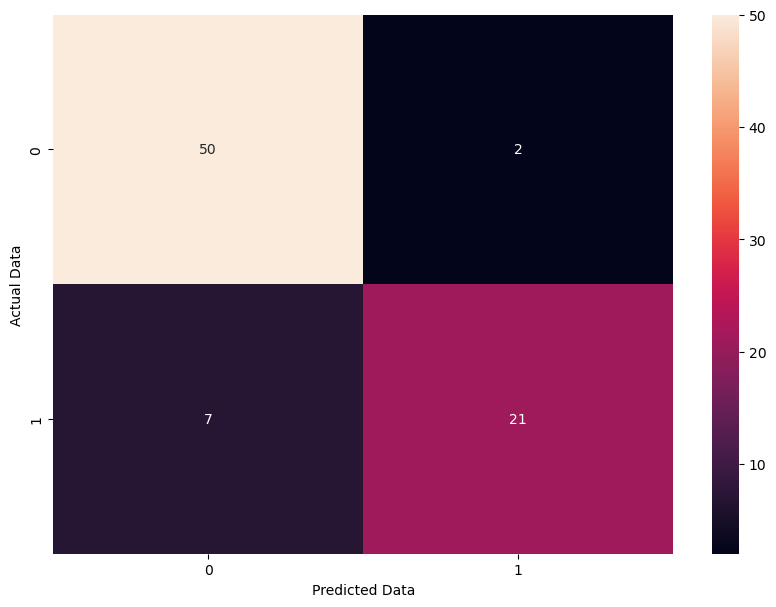

In [85]:
plt.figure(figsize=(10,7))
sb.heatmap(con_m, annot= True)
plt.xlabel('Predicted Data')
plt.ylabel('Actual Data')

In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
lin_m= LinearRegression()

In [88]:
lin_m.fit(np.array(x_train).reshape(-1,1), y_train)

LinearRegression()

In [89]:
lin_m.score(np.array(x_test).reshape(-1,1), y_test)

0.4711452381718355

######  Accuracy = 47% through linear Regression model 

## Digits Data:

In [48]:
from sklearn.datasets import load_digits

In [49]:
digits= load_digits()

In [50]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [51]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [52]:
plt.gray()

<Figure size 640x480 with 0 Axes>

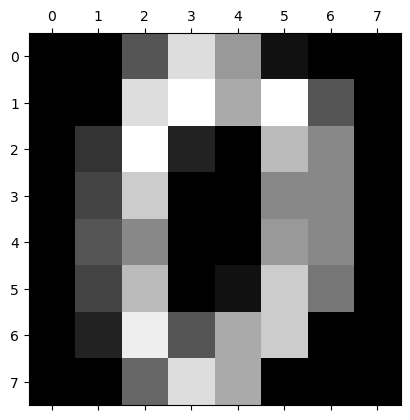

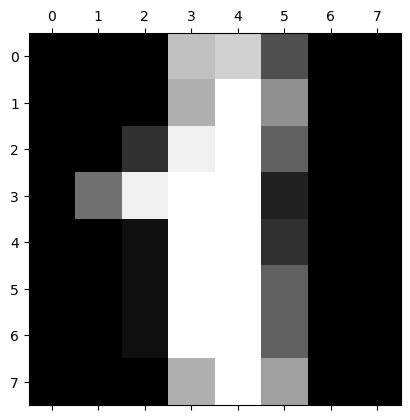

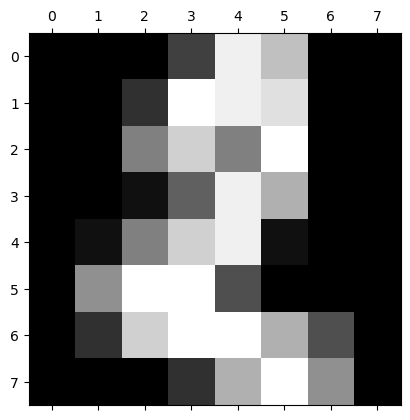

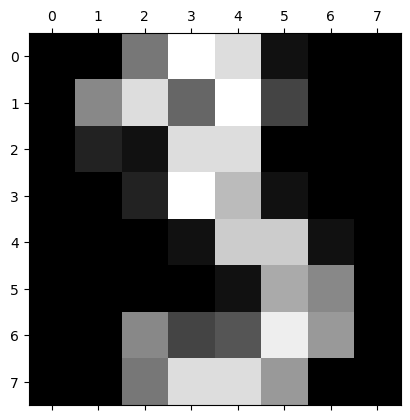

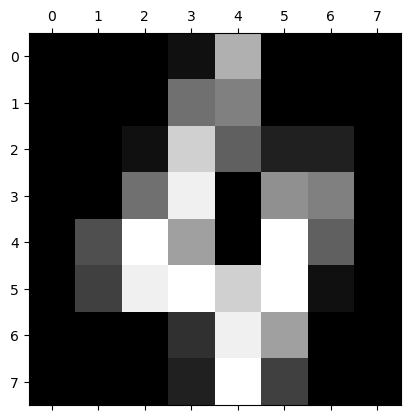

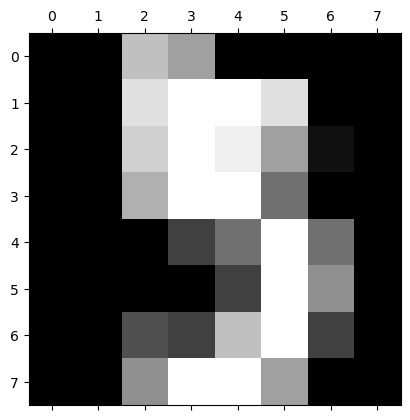

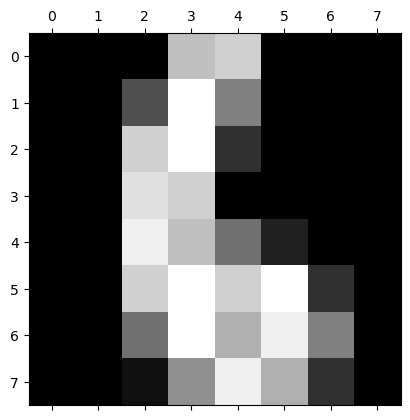

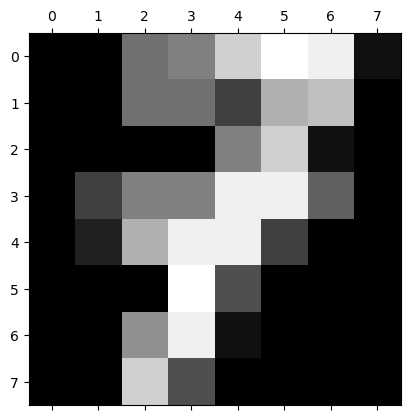

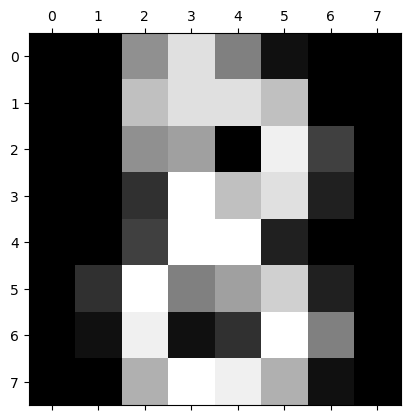

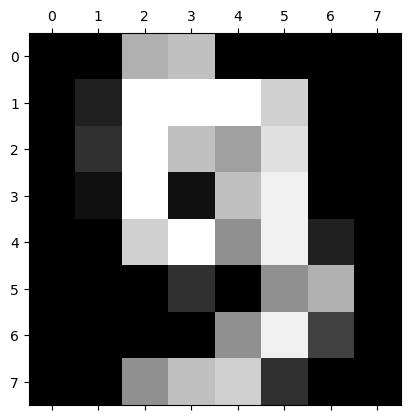

In [53]:
for digit in range(10):
    plt.matshow(digits.images[digit])

In [54]:
digits.target[0:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [55]:
x_train, x_test, y_train, y_test= train_test_split(digits.data, digits.target, test_size =0.2)

In [57]:
len(x_train), len(x_test)

(1437, 360)

In [56]:
logR_model2= LogisticRegression()

In [58]:
logR_model2.fit(x_train, y_train)

C:\Users\Welcome\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
logR_model2.score(x_test, y_test)

0.9611111111111111

######  Accuracy = 96% through logical Regression model 

In [60]:
y_predict= logR_model2.predict(x_test)

In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
c_mat= confusion_matrix(y_test, y_predict)

In [63]:
c_mat

array([[34,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 30,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 31,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0, 35,  1,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 40,  0,  1,  0],
       [ 0,  0,  0,  1,  1,  0,  0, 35,  0,  0],
       [ 0,  0,  1,  0,  0,  1,  0,  0, 33,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  2, 37]], dtype=int64)

Text(95.72222222222221, 0.5, 'Actual Data')

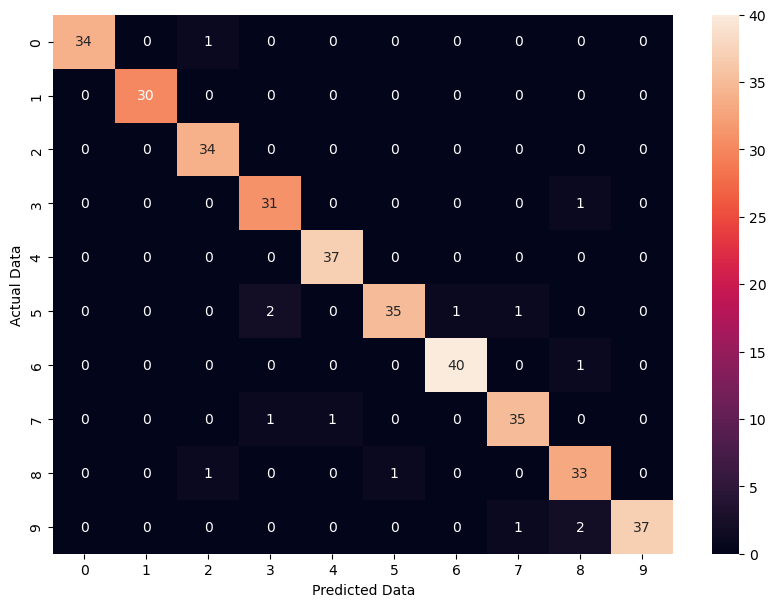

In [67]:
plt.figure(figsize=(10,7))
sb.heatmap(c_mat, annot= True)
plt.xlabel('Predicted Data')
plt.ylabel('Actual Data')